# Lab One: Visualization and Data Processing 

## Group 1: Kebur Fantahun, Eli Kravez, Halle Purdom, Anthony Egbuniwe


To run this notebook, place bank-additional-full.csv dataset in the same folder as this notebook. 

In [85]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for feature selection and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Remove warnings
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# <span style="text-decoration:underline">Business Understanding</span>

In order to evaluate the success of their bank telemarketing campaigns, a Portuguese banking institution collected data on their customers including whether or not a customer subscribed to a term deposit. These variables included factors dependent on the individual customer’s telemarketing experience and unrelated factors such as marital status, education, and job.

In this case, a good prediction algorithm is defined as one that has high success in predicting whether or not a customer will subscribe to a term deposit. Interpretability, or finding the most relevant attributes, would be important in determining an effective model as it could inform on a target audience the bank should telemarket towards for a higher chance of success or help in determing the telemarketing campaign that would most likely lead to success. The effectiveness of the prediction model would be measured by a CM (confusion matrix) or an AUC-ROC curve (area under the ROC (receiver operating characteristic) curve).

# <span style="text-decoration:underline">Meaning and Type of Data</span>

The Bank Marketing Data Set includes 41,188 observations collected between May 2008 and November 2010. This data set is provided by UCI, and was originally used in the paper, “A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems.” The data set was collected from a Portuguese banking institution running marketing campaigns via phone calls. 

| Number      | Attribute | Meaning | Type/Scale |
| ----------- | ----------- | ----------- | ----------- |
|**Bank customer data:** |
| 1      | age       | Age of customer | numeric: 17-98 |
| 2   | job        | Customer's job | categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown' |
| 3   | marital        | Customer's marital status | categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed |
| 4   | education        | Level of customer's education | categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown' |
| 5   | default        | Whether or not the customer has credit in default | categorical: 'no','yes','unknown' |
| 6   | housing        | Whether or not customer has a housing loan | categorical: 'no','yes','unknown'|
| 7   | loan        | Whether or not a customer has a personal loan  | categorical: 'no','yes','unknown'  |
|**Related with the last contact of the current campaign:** |
| 8   | contact        | Communication type | categorical: 'cellular','telephone' |
| 9   | month        | Last contact with customer month of year | categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec' |
| 10   | day_of_week        | Last contact with customer day of week | categorical: 'mon','tue','wed','thu','fri' |
| 11   | duration        | Last contact with customer duration in seconds | numeric: 0-4918;  "Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model." (Reference below) |
| **Other attributes :**|
| 12   | campaign | Number of contacts performed during this campaign and for this customer | numeric, includes last contact: 1-56|
| 13 | pdays | Number of days that passed by after the customer was last contacted from a previous campaign | numeric,  999 means client was not previously contacted: 0-999 |
| 14 | previous | Number of contacts performed before this campaign and for this customer | numeric: 0-7 |
| 15 |  poutcome | Outcome of the previous marketing campaign | categorical: 'failure','nonexistent','success' |
| **Social and economic context attributes:** |
|16 | emp.var.rate | Employment variation rate - quarterly indicator.  | numeric: -3.4-1.4 |
|17 | cons.price.idx | Consumer price index - monthly indicator | numeric: 92.201-94.767 |
|18 | cons.conf.idx | Consumer confidence index - monthly indicator | numeric: -50.8--26.9 |
|19 | euribor3m | Euribor 3 month rate - daily indicator. This is a daily reference rate produced by the  by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market. | numeric: 0.634-5.045 |
|20 | nr.employed | Number of employees - quarterly indicator | numeric: 4963.6-5228.1 | 
| **Target Variable:** |
| 21 | y | Whether or not a customer subscribed to a term deposit | binary: 'yes','no' |

Reference: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [86]:
# Read in the data
bank_df = pd.read_csv("bank-additional-full.csv", sep=';')

In [87]:
# Check first 5 observations of data
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
# Size of dataset: Number of observations and number of attributes (columns)
bank_df.shape

(41188, 21)

In [89]:
# Get a summary of the variables and data types
print (bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# <span style="text-decoration:underline">Data Quality</span>

**Duplicate data:** 
There are 12 completely duplicated rows in the data. We remove the duplicates to keep the data accurate.

In [90]:
# Finding and printing duplicate observations
duplicate = bank_df[bank_df.duplicated()]
print("Number of the duplicate rows: " + str(len(duplicate)))

print("Duplicate Rows :")
duplicate

Number of the duplicate rows: 12
Duplicate Rows :


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [91]:
# Drop duplicate rows from the data
bank_df.drop_duplicates(keep='first', inplace=True)


**Missing Data:**
There are no missing values in the dataset.  

However, there were a significant amount of observations with the value 'unknown' in the data. These values are visualized under the missing data below. 
One particular column in the dataset, the default column, has over 20% unknowns. The rest 99% of the values are “no” and only 3 “yes”. We will consider dropping this column from our dataset because there was little practical significance in keeping the column.

When creating a predictive model we will consider many options such as imputing the datapoints with the 'unknown' values or removing specific attributes with a high percentage of unknowns from the model. Because these data points are not technically missing values and have the potential to have other meanings like 'other', we will weigh the benefit of leaving these values as 'unknown' should it be useful for predictive modeling. 

In [92]:
# Checking for missing values
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [93]:
# Replace 'unknown's with null
bank_df_mv = bank_df.replace(to_replace='unknown',value=np.nan)
# Checking amount of 'unknown's in data
bank_df_mv.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**Outlier check for numeric variables:**

**age**: We can see that over 70 years old is considered as an outlier in the data. As this is reasonable to have some percentage of customers in this age range we do not plan to fix this.

There are in total 422 customers with the age > 70, which is ~ 1% of data. Interesting to see that 202 of them outcome is yes which is rather high success rate of 48%.  

**campaign:** Number of contacts performed during this campaign and for this client (numeric, includes last contact).

Number of contacts to the client which is  > 10 seems very unreasonable. 
There are 2% of the data with the number of campains > 10. We will treat this as an outlier and change campaing value to the global median.

**pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).

Default value of 999 might be a problem for the classification/prediction algortims. We should consider and change this.  
Consider to change to categorical: never , few days, week , longer...

**previous:** Number of contacts before this campaign for specific customer. Integer values from 0 to 7. with 1-7 appearing as outliers in the below boxplot. Due to large amount of customers who had no contact before this campaign, no need to take action on these outliers. 

**emp.var.rate:** Employment variation rate - quarterly indicator, no outliers with right skew. 

**cons.price.idx:** Consumer price index - monthly indicator, no outliers or skew. 

**cons.conf.idx:** : Consumer confidence index - monthly indicator, no outliers or skew.

**euribor3m:** Euribor 3 month rate - daily indicator, no outliers with right skew. 

**nr.employed:** Number of employees - quarterly indicator, no outliers with right skew. 

<ipython-input-94-d3e49778df48>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  f.tight_layout(pad=3.0)


<AxesSubplot:xlabel='nr.employed'>

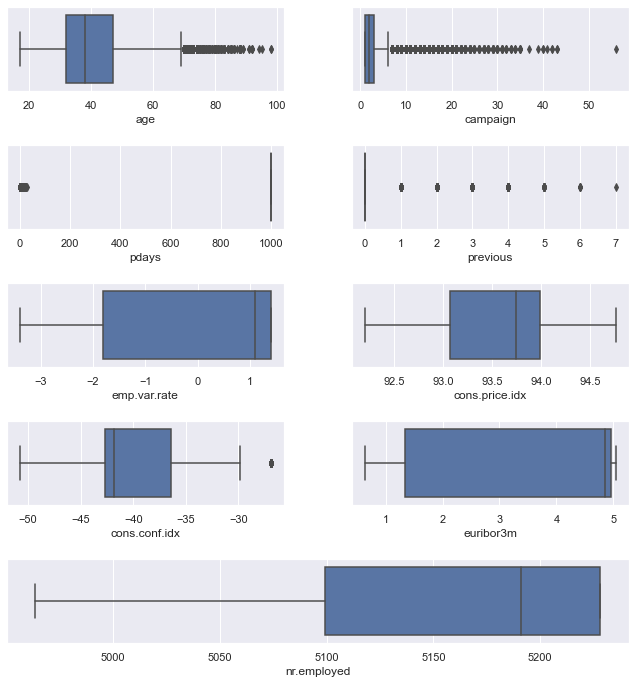

In [94]:
# Producing boxplots of numeric attributes for outlier and distribution check
f, axes = plt.subplots(5, 2, figsize=(10, 10), constrained_layout=True)
f.tight_layout(pad=3.0)

sns.boxplot(x=bank_df['age'], ax=axes[0,0])
sns.boxplot(x=bank_df['campaign'], ax=axes[0,1])
sns.boxplot(x=bank_df['pdays'], ax=axes[1,0])
sns.boxplot(x=bank_df['previous'], ax=axes[1,1])
sns.boxplot(x=bank_df['emp.var.rate'], ax=axes[2,0])
sns.boxplot(x=bank_df['cons.price.idx'], ax=axes[2,1])

sns.boxplot(x=bank_df['cons.conf.idx'], ax=axes[3,0])
sns.boxplot(x=bank_df['euribor3m'], ax=axes[3,1]) 

plt.subplot(5, 1, 5)
sns.boxplot(x=bank_df['nr.employed'])

In [95]:
# Checking age observations over 70 years old
print("Total number of customers over 70 years old:")
print(len(bank_df.loc[bank_df['age'] > 70]))
# Getting percentage observations over 70 years old
print("Percent of rows with customers over 70 years old:")
print((len(bank_df.loc[bank_df['age'] > 70])/len(bank_df))*100)

Total number of customers over 70 years old:
421
Percent of rows with customers over 70 years old:
1.0224402564600739


In [96]:
# Number of customers over 70 years old that subscribed to a term deposit
len(bank_df.loc[(bank_df['age'] > 70) & (bank_df['y'] == 'yes')])

202

## Categorical Exploration

**y**: Has the client subscribed a term deposit? (binary: 'yes','no')
This is target parameter. We can see very unbalanced data set - something to consider during the modeling stage. 

<AxesSubplot:xlabel='y', ylabel='count'>

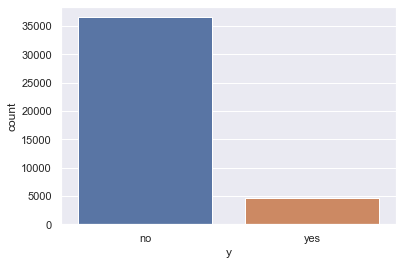

In [97]:
# Checking distribution of 'yes' versus 'no' values for class
sns.countplot(x=bank_df['y']) 

**job**: The most popular jobs of our customers are: admin, blue-collar and technician.  
We also can see small percentage of customers with unknown job status.

<AxesSubplot:xlabel='job', ylabel='count'>

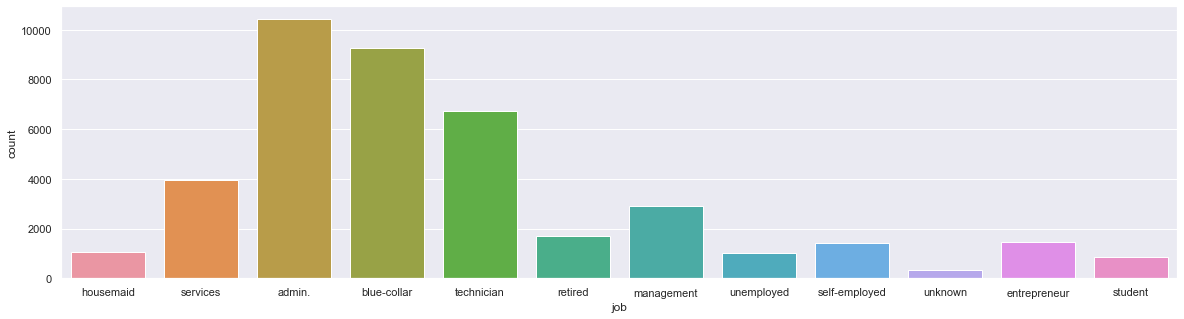

In [98]:
# Distribution of job categories
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x=bank_df['job']) 

**marital**: Most of the customers are married.

<AxesSubplot:xlabel='marital', ylabel='count'>

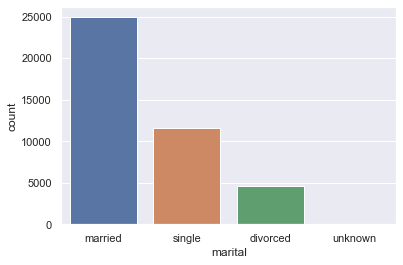

In [99]:
# Distribution of marital status categories
sns.countplot(x=bank_df['marital']) 

**education**: We see high number of customers with a university degree.  
Data processing plan: 
1. Unify basic.4y, basic.6y and basic basic.9y
2. Convert to bucket feature

<AxesSubplot:xlabel='education', ylabel='count'>

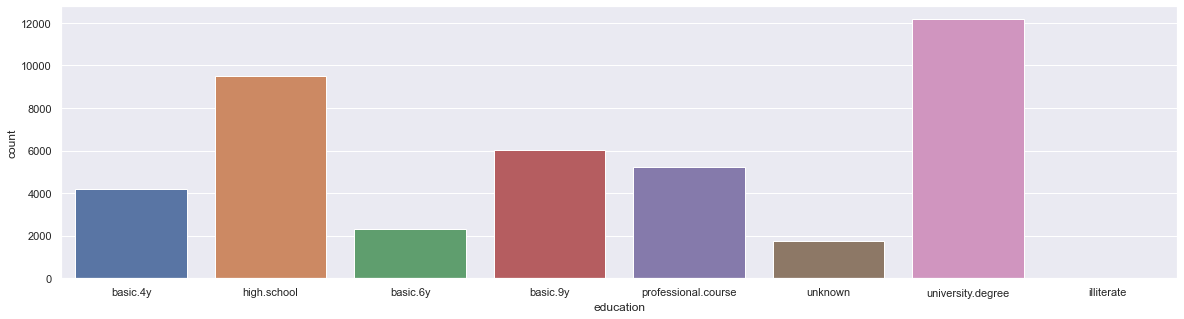

In [100]:
# Distribution of education categories
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x=bank_df['education']) 

**default**: Has credit in default?  
We can see that there are 3 'yes' values in this column, with 20.88% unknowns. The remaining observations are 'no'. 
We will consider to drop this column in our analysis as the only values it has are: no or unknown.  

3
20.876238585583835


<AxesSubplot:xlabel='default', ylabel='count'>

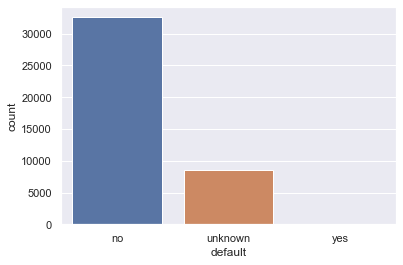

In [101]:
# Looking up amount of 'yes' values in default column
print(len(bank_df[bank_df.default == "yes"]))

# Calculating percentage 'unknown's in default column
print(len(bank_df[bank_df.default == "unknown"])/len(bank_df)*100)

# Countplot of default column
sns.countplot(x=bank_df['default']) 

 **loan**: Has personal loan?  
 Most of our customers do not have personal loan.

<AxesSubplot:xlabel='loan', ylabel='count'>

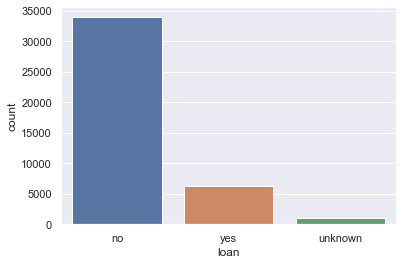

In [102]:
# Distribution of loan categories
sns.countplot(x=bank_df['loan']) 

**month**: Last contact month of year.  
Most of the customers were contacted last time in May.

<AxesSubplot:xlabel='month', ylabel='count'>

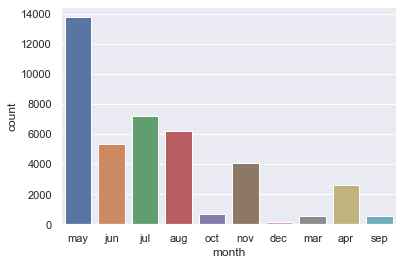

In [103]:
# Distribution of month categories
sns.countplot(x=bank_df['month']) 

**day_of_week**: Last contact day of the week.  
We do not see any specific day of the week which more popular for the contact

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

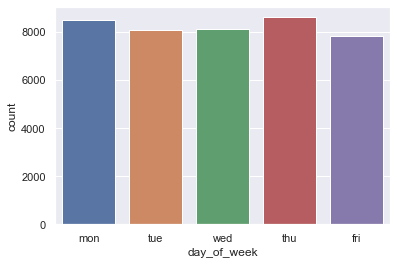

In [104]:
# Distribution of day_of_week categories
sns.countplot(x=bank_df['day_of_week']) 

**poutcome**: Outcome of the previous marketing campaign.  
Most of current customers in our campaign didn't participate in the prevoius campaign.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

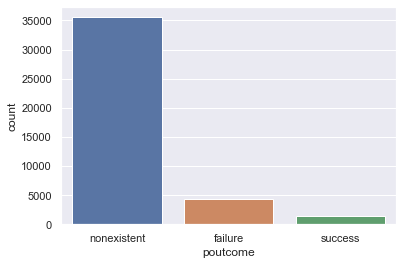

In [105]:
# Distribution of poutcome categories
sns.countplot(x=bank_df['poutcome']) 

# <span style="text-decoration:underline">Descriptive Statistics</span>

Descriptive statistics for the numerical variables are listed below.  

We found that for age, the oldest customer reached age 98 years. The longest duration of a call reached 1.4 hours, and the most amount of times the bank called a customer reached 56 times. This is a relatively high value but over a long amount of time could make more sense. For pdays, all customers that were never previously contacted were logged as 999 days, so this maximum represents those customers. Becaue of this, before creating a predictive model from this data those observations need to be converted into a value that can be more useful for predictive purposes. The number of times a customer was contacted before this campaign reached a max of 7, but was heavily skewed so most customers were not contacted before this campaign began. 

In [106]:
# Adding continuous attributes to a list
continuous_features = ['age','duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                       'cons.conf.idx', 'euribor3m', 'nr.employed']

# Adding categorical attributes to a list
categ_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'education']

In [107]:
bank_df.describe() # summary of continuous or the nominals

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [108]:
# Grouping dataframe by class
bank_df_grouped_class = bank_df.groupby(by='y')

In [109]:
# Checking percentage of 'yes' and 'no' class values in dataframe
print("Percentage on Yes: " + str(len(bank_df[bank_df.y=='yes'])/len(bank_df)*100.0)) 
print("Percentage on No: " + str(len(bank_df[bank_df.y=='no'])/len(bank_df)*100.0)) 

Percentage on Yes: 11.266271614532737
Percentage on No: 88.73372838546726


In [110]:
# Creating categorical/bucket variable for age 
bank_df['age_range'] = pd.cut(bank_df.age,[17,35,55,1e6],3,labels=['young_adults (17-35)','middle_aged (36-55)','seniors (56+)']) 
bank_df.age_range.describe()

count                   41171
unique                      3
top       middle_aged (36-55)
freq                    21086
Name: age_range, dtype: object

In [111]:
# Mean values of each attribute separated by class
bank_df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
yes,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


Based on the mean comparison above between the yes/no groups, we can see that duration, pdays, and euribor3m look to be good predictors for whether or not a customer will subscribe to a term deposit. 

# <span style="text-decoration:underline">Relationships between Attributes</span>

In [112]:
# Heatmap formatting
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

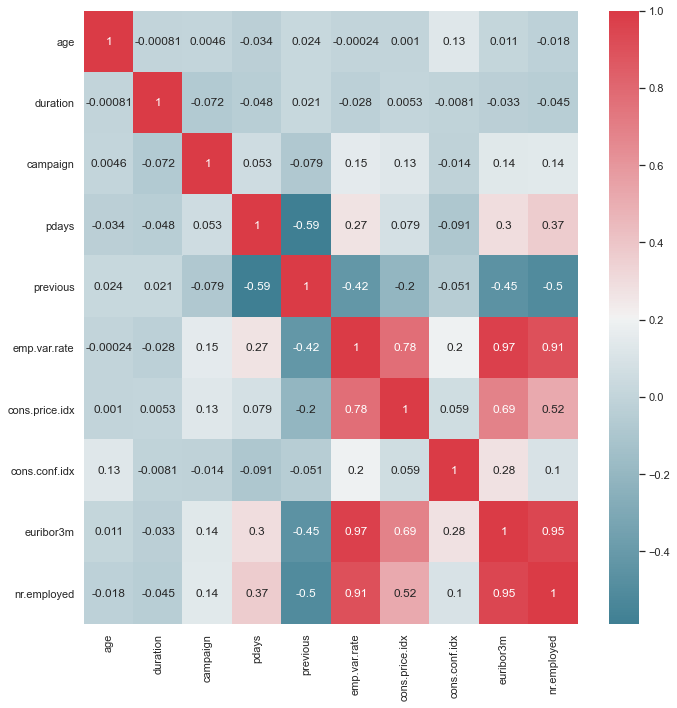

In [113]:
# Heatmap of correlations between attributes
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(bank_df[continuous_features].corr(), cmap=cmap, annot=True)

f.tight_layout()

We see strong correlation between the below predictors:

1.	Euriborn3m and nr.employed – 0.95 Pearson correlation
2.	nr.employed and emp.var.rate – 0.97 Pearson correlation
3.	emp.var.rate and Euriborn3m – 0.91 Pearson correlation

In the case of using a parametric model for our predictions, we will consider removing attributes with strong correlations in order to address multicollinearity. 

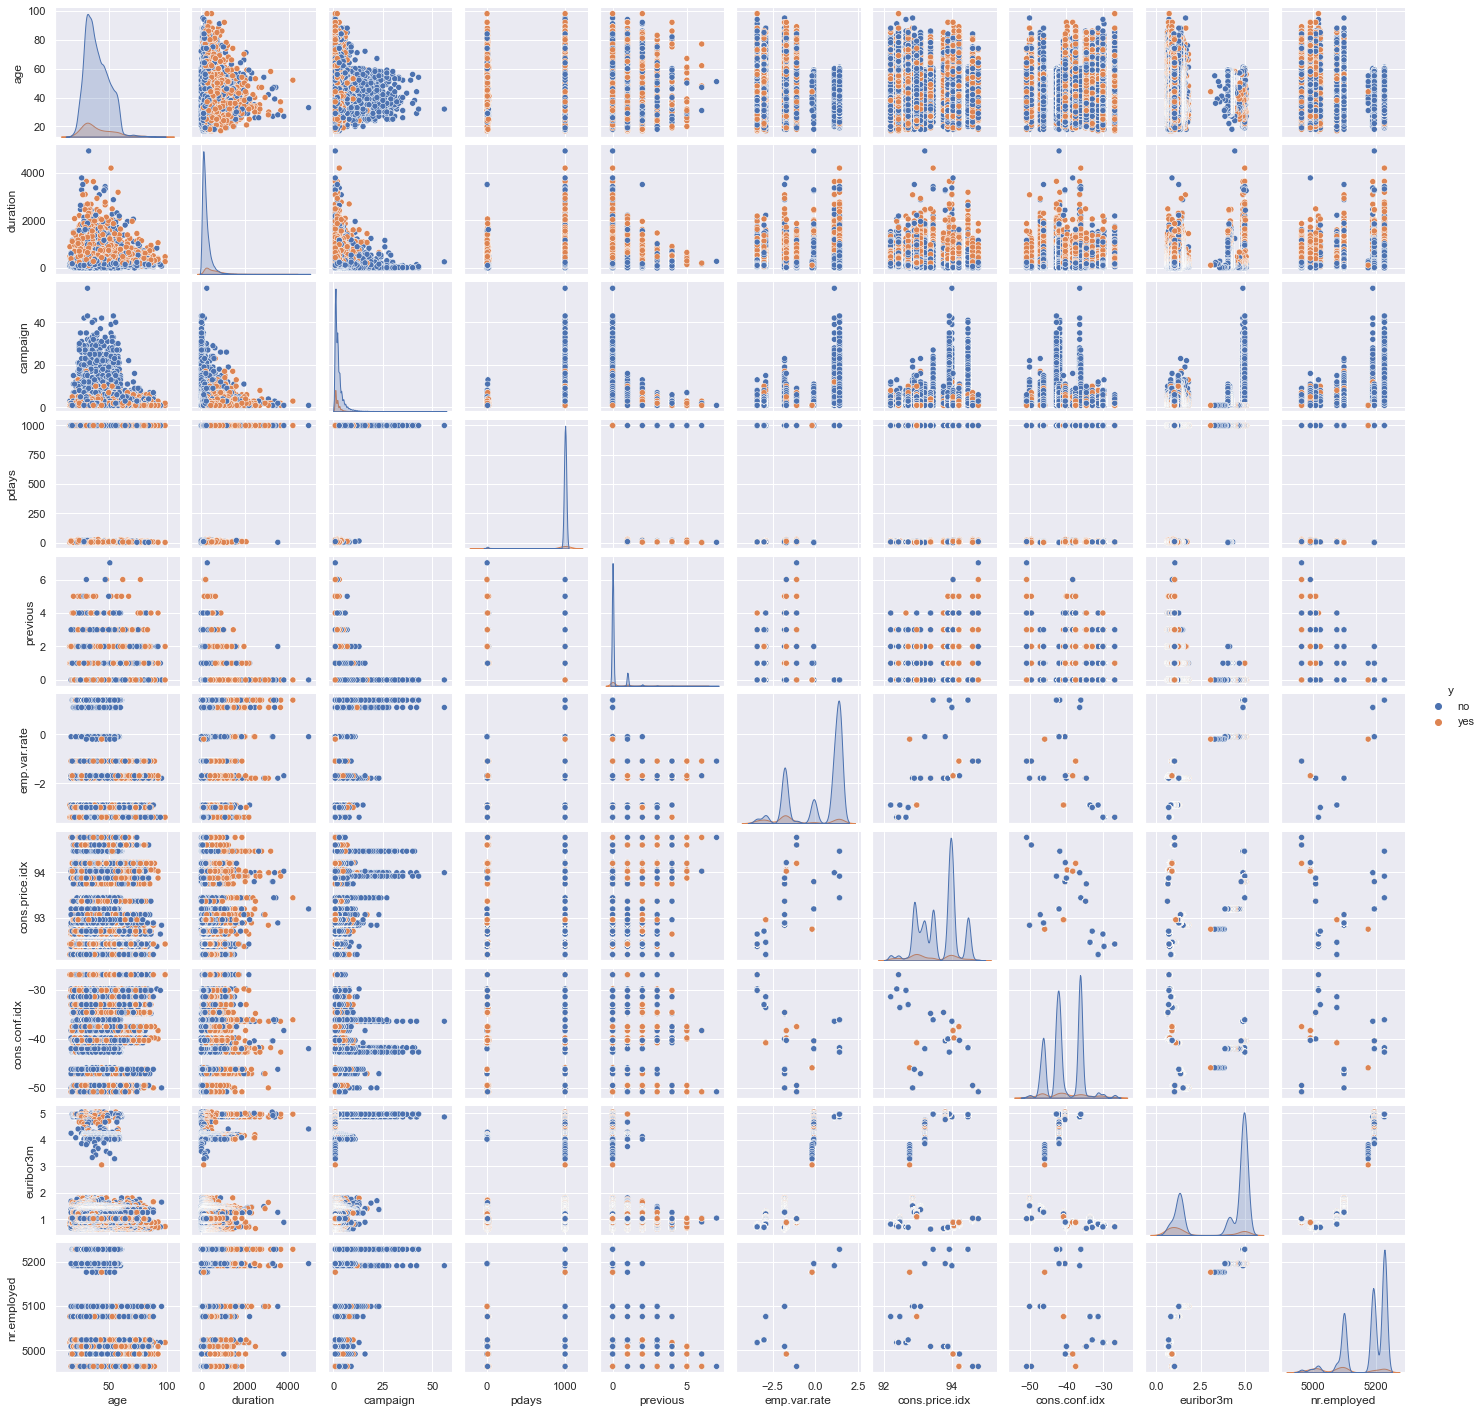

In [114]:
# Scatterplots and density plots for all numeric attributes
sns.pairplot(bank_df, hue="y", height=2)

In these scatterplots and distribution graphs, the blue represents 'no' values and the orange represents 'yes' values.

From these graphs, we noticed that in the duration and campaign attribute, we see a lot of '0' values. In the campagin distribution graph, we also can see bigger spikes of 'yes' values where there were less campagins (or calls) to the customer compared to 'no' values. The age distribution also appears to look similar for customers who did and did not subscribe to a term deposit.

<AxesSubplot:xlabel='education', ylabel='age'>

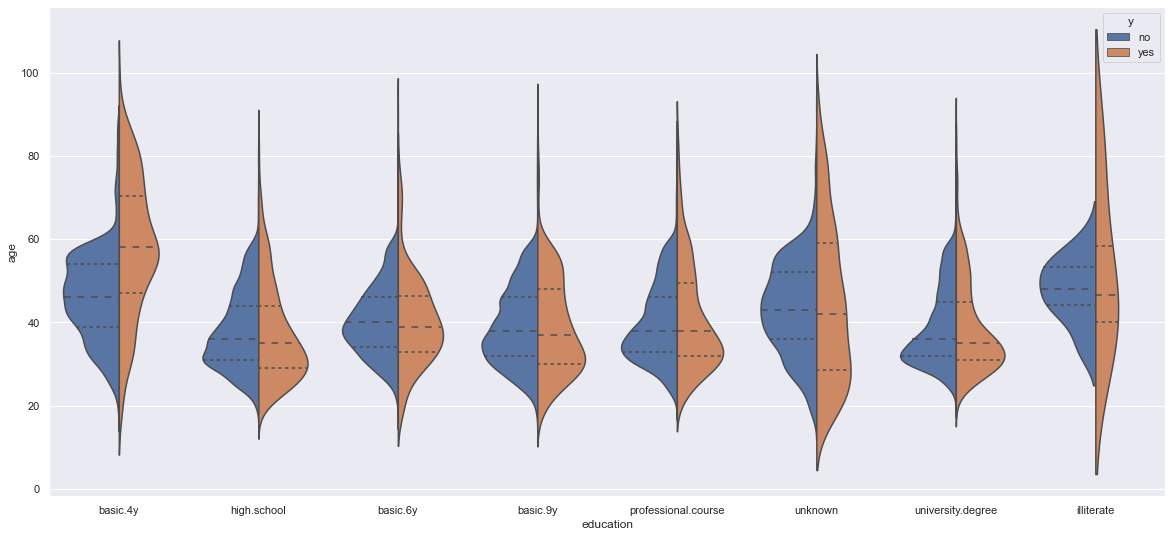

In [115]:
# Violin plots for numeric attributes separated by class
f, ax = plt.subplots(figsize=(20, 9))

sns.violinplot(x="education", y="age", hue="y", data=bank_df, 
               split=True, inner="quart")

The distributions for high school, basic 6 year, basic 9 year, professional course, and univeristy degree appear about the same between the 'yes' and 'no' values. The 'yes' distributions for basic 4 year, unknown, and illiterate however are much more spread out in distribution compared to the no values. 

<AxesSubplot:xlabel='marital', ylabel='age'>

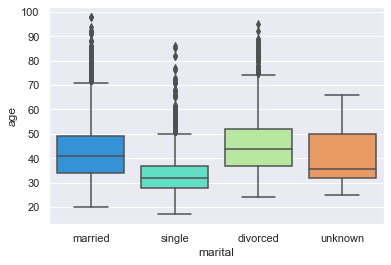

In [116]:
# Boxplots comparing age for each marital status category
sns.boxplot(x='marital', y='age', data = bank_df, palette ='rainbow')

From the boxplots comparing age with marital status, we can see that single customers are usually younger, which makes practical sense. 

<AxesSubplot:xlabel='housing', ylabel='age'>

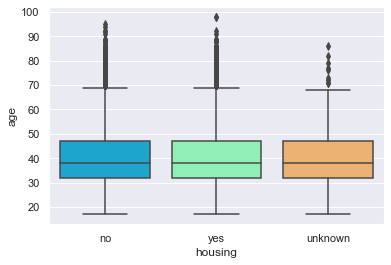

In [117]:
# Boxplots comparing age for each housing category
sns.boxplot(x='housing', y='age', data = bank_df, palette ='rainbow')

A customer having a housing loan also doesn't seem to be dependent on age based on the boxplot. 

<AxesSubplot:xlabel='job', ylabel='age'>

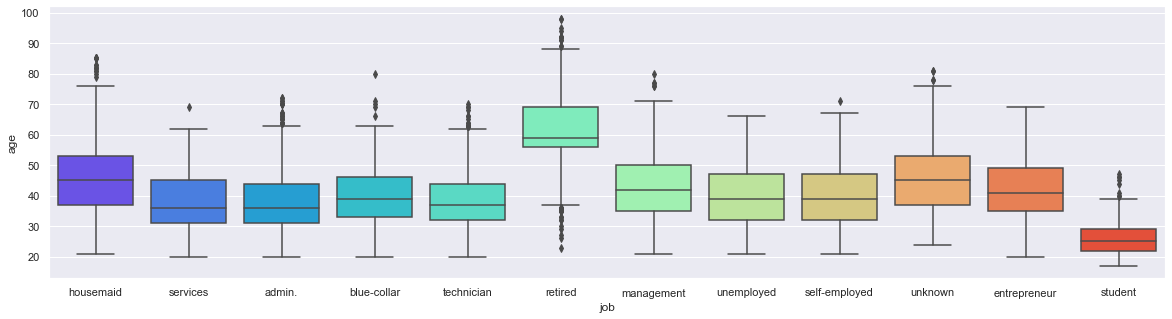

In [118]:
# Boxplots comparing age for each job category
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='job', y='age', data = bank_df, palette ='rainbow')

From the boxplot, many older customers are retired and many of the younger customers are students. 

<AxesSubplot:xlabel='contact', ylabel='age'>

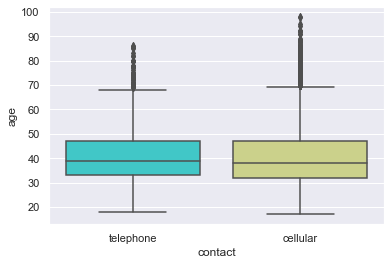

In [119]:
# Boxplots comparing age for each contact category
sns.boxplot(x='contact', y='age', data = bank_df, palette ='rainbow')

<AxesSubplot:xlabel='contact', ylabel='duration'>

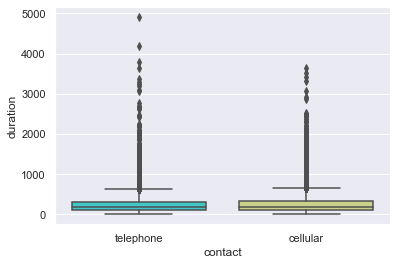

In [120]:
# Boxplots comparing duration for each contact category
sns.boxplot(x='contact', y='duration', data = bank_df, palette ='rainbow')

<AxesSubplot:xlabel='contact', ylabel='campaign'>

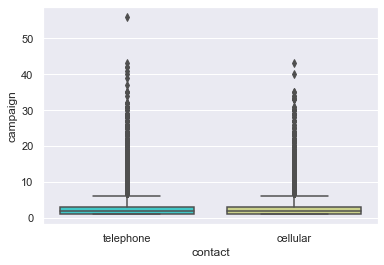

In [121]:
# Boxplots comparing campaign for each contact category
sns.boxplot(x='contact', y='campaign', data = bank_df, palette ='rainbow')

# <span style="text-decoration:underline">Most Important Features and Relationships between Features and Class</span>

We chose to visualize duration, age, campaign, previous, and euribor3m with boxplots in order to see their distribution, their skew, their outliers, and compare yes/no observations. 

<AxesSubplot:xlabel='y', ylabel='duration'>

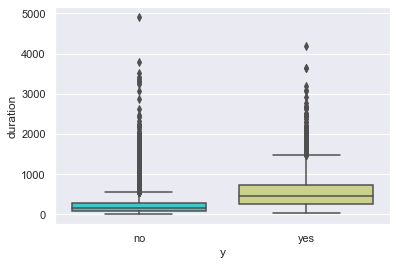

In [122]:
# Boxplots comparing duration for each class
sns.boxplot(x='y', y='duration', data = bank_df, palette ='rainbow')

The distribution for 'yes' values is distributed slightly higher than the 'no' values. There is also an extreme outlier for the maximum 'no' value at almost 5,000 seconds (1.4 hours). 

<AxesSubplot:xlabel='y', ylabel='age'>

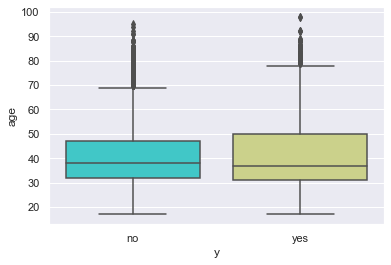

In [123]:
# Boxplots comparing age for each class
sns.boxplot(x='y', y='age', data = bank_df, palette ='rainbow')

Looking at the age distributions for subscribing to a term deposit, there is not a huge difference in distributions. We do see that the 'yes' distribution is spread a little more than the 'no' distribution. 

<AxesSubplot:xlabel='y', ylabel='campaign'>

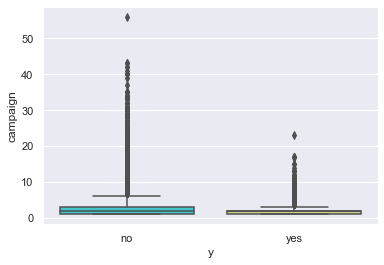

In [124]:
# Boxplots comparing campaign for each class
sns.boxplot(x='y', y='campaign', data = bank_df, palette ='rainbow')

Looking at campaign, it appears that once you get above ~25 calls, the chances of subscribing to a term deposit are almost none based on this dataset. 

<AxesSubplot:xlabel='y', ylabel='previous'>

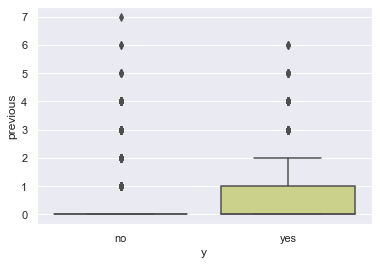

In [125]:
# Boxplots comparing previous contact for each class
sns.boxplot(x='y', y='previous', data = bank_df, palette ='rainbow')

Based on the number of contacts before the campaign for a client, the distribution for 'yes' values is distributed more over 0-2 previous contacts, whereas the no value has most of its values at 0. Previous contact with a customer seems to make it more likely they will subscribe to a term deposit. 

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

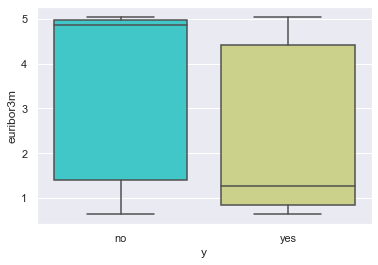

In [126]:
# Boxplots comparing euribor3m for each class
sns.boxplot(x='y', y='euribor3m', data = bank_df, palette ='rainbow')

When Euribor 3 month rate is lower, there are more 'yes' values for subscribing to a term deposit. When it is higher, there are more 'no' values. This makes practical sense as it is the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market.

In order to compare the percentages of marital, month, education, and age range we chose to look at bar graphs to clearly see how they compare to the overall dataset class percentage of ~89% 'no' and ~11% 'yes' values. 

In [147]:
# Function to compare distribution of yes/no class for categorical variables
def correlation_class_categorical(x, y):
    #f, ax = plt.subplots(figsize=(20, 5))
    bank_stats = (bank_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percentage')
    .reset_index())

    p = sns.barplot(x=x, y="percentage", hue=y, data=bank_stats)
    _ = plt.setp(p.get_xticklabels(), rotation=45) 

# Function to display 'yes' percentages
def correlation_class_categorical_percentage(x):
    count_group_class = bank_df[bank_df.y == 'yes'].groupby(x).count()['y']
    count_group_total = bank_df.groupby(x).count()['y']
    print((count_group_class/count_group_total)*100)

marital
divorced    10.323140
married     10.156093
single      14.008993
unknown     15.000000
Name: y, dtype: float64


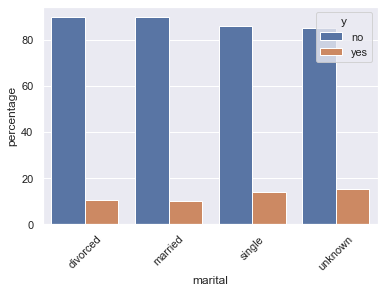

In [148]:
# Barplot and percentages comparing class distribution for marital status
correlation_class_categorical_percentage('marital')
correlation_class_categorical('marital', 'y')

We do not see much difference in the classification differences of marital status between 'yes' and 'no' values. There is a slighly greater single and unknown percentage for the 'yes' values. These heavy differences between percentage of yes/no values are also consistent with our data set distribution of 88.7% no and 11.3% yes. 

month
apr    20.486507
aug    10.605570
dec    48.901099
jul     9.038918
jun    10.511470
mar    50.549451
may     6.435680
nov    10.146341
oct    43.933054
sep    44.912281
Name: y, dtype: float64


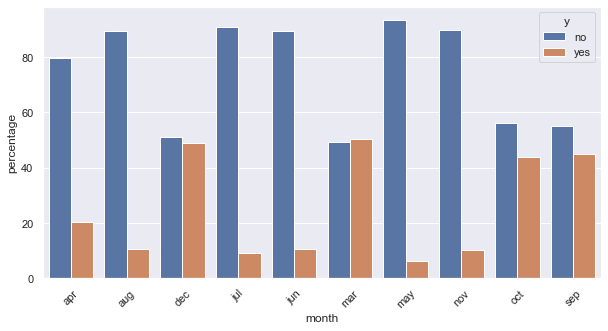

In [149]:
# Barplot and percentages comparing class distribution for month
correlation_class_categorical_percentage('month')
f, ax = plt.subplots(figsize=(10, 5))
correlation_class_categorical('month', 'y')

In the above graph, we see significant deviations from the dataset distribution of yes/no values. December, March, October, and September are all reaching 50/50 percentages, meaning it is much more likely for a customer to subscribe to a term deposit during those months. 

education
basic.4y               10.249042
basic.6y                8.206024
basic.9y                7.824648
high.school            10.838940
illiterate             22.222222
professional.course    11.354962
university.degree      13.720816
unknown                14.508671
Name: y, dtype: float64


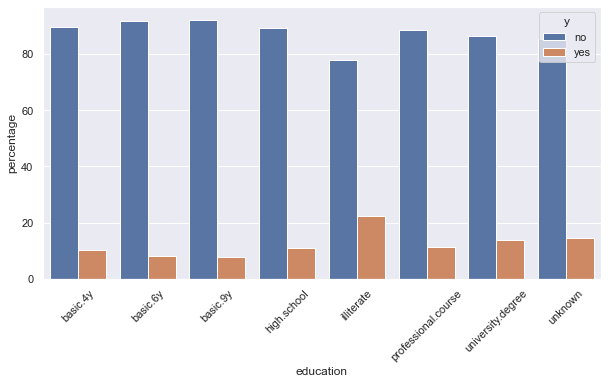

In [150]:
# Barplot and percentages comparing class distribution for education
correlation_class_categorical_percentage('education')
f, ax = plt.subplots(figsize=(10, 5))
correlation_class_categorical('education', 'y')

For illiterate customers, the 'yes' percentage reaches around 22.22%, which is  about 11% higher than the dataset 'yes' percentages. It is more likley for illiterate customers to subscribe to a term deposit. 

age_range
young_adults (17-35)    12.645419
middle_aged (36-55)      8.579152
seniors (56+)           20.692544
Name: y, dtype: float64


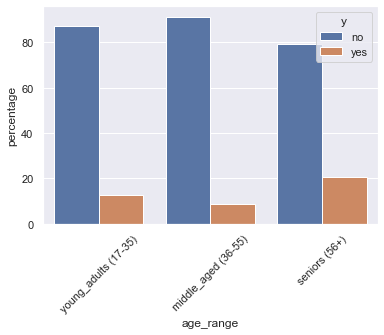

In [151]:
# Barplot and percentages comparing class distribution for age (categorical)
correlation_class_categorical_percentage('age_range')
correlation_class_categorical('age_range', 'y')

Customers 56 and older subscribed to a term deposit from this dataset at a 20.69% rate, compared to the dataset's 11% 'yes' rate. Seniors were more likely to subscribe to a term deposit. Young adults were also slightly more likely to subscribe when compared to middle aged customers. 

To look more into which features are most interesting and important in addition to the relationship between those features and class, we used logistic regression and isolated those with the highest and lowest coefficient values. 

In [132]:
# Logistic regression for feature selection using L1 normalization

# Standardizing numerical variables
continuous_features_df = bank_df[continuous_features]
target = bank_df[['y']]
features_standartization = StandardScaler().fit_transform(continuous_features_df)

# Get_dummies for categorical variables
bank_df_dummies = pd.get_dummies(bank_df[categ_features], drop_first=False)

# Target variable should be integer
target_int = (bank_df[['y']].y == 'yes').astype('int')

# Bringing standardized variables back together into a dataframe
bank_df_standartized = pd.DataFrame(features_standartization, index=continuous_features_df.index, columns=continuous_features_df.columns)

# Combining dataframes
dataset_model = pd.concat([bank_df_standartized, bank_df_dummies, target_int], axis=1)  #bank_df_dummies

# Dropping original classes to only use numeric
if('y' in dataset_model):
    del dataset_model['y']
dataset_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  float64
 1   duration                       41176 non-null  float64
 2   campaign                       41176 non-null  float64
 3   pdays                          41176 non-null  float64
 4   previous                       41176 non-null  float64
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  job_admin.                     41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

In [133]:
# Creating train and test split 
X_train,X_test,y_train,y_test = train_test_split(dataset_model, target_int, test_size=0.3,random_state=11)

# Logistic regression model
logreg = LogisticRegression(random_state = 0, penalty = 'l1', tol=0.01, solver='saga', C=0.1) # solver = liblinear
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

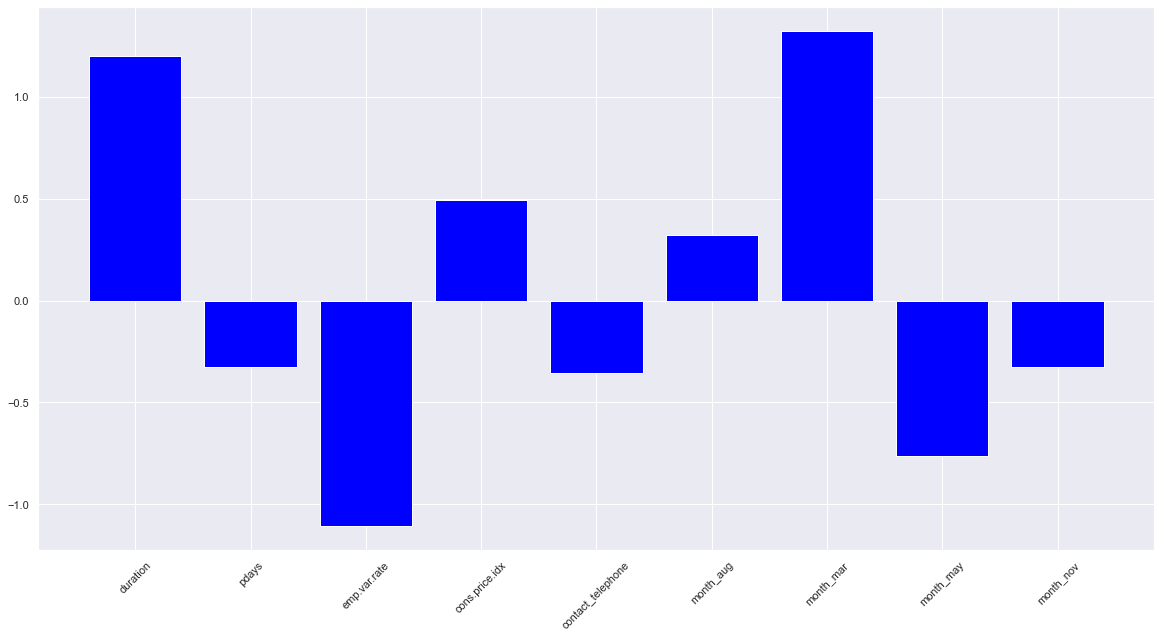

In [134]:
# Mapping coefficient list from output back into columns
logreg_coeff = pd.DataFrame()
logreg_coeff["Columns"] = X_train.columns
logreg_coeff['Coefficient Estimate'] = pd.Series(logreg.coef_[0])

# Finding coefficients above and below a specific threshold 
most_powerful = logreg_coeff[ (logreg_coeff['Coefficient Estimate'] > 0.3) | (logreg_coeff['Coefficient Estimate'] < -0.3)]

# Visualize
fig, ax = plt.subplots(figsize =(20, 10))

 
ax.bar(most_powerful["Columns"],
most_powerful['Coefficient Estimate'],
color = 'blue')
plt.xticks(rotation = 45)

plt.show()

The above looks at the features with the highest and lowest coefficients from our logistic regression model. Duration and the month of March have the highest coefficients, and emp.var.rate has the lowest coefficients with the month of May second lowest. Other features with high positiva and negative coefficients include month August, pdays, contact_telephone, and month of May. 

# PCA

To look more into the separation between yes/no values, we use the numeric variables from the dataset to conduct PCA and see if any large separations could be found between the groups. 

In [135]:
# Defining target variable as class
pca_target = bank_df[['y']]

In [136]:
# Checking first observations of target variable
pca_target.head()

,y
0,no
1,no
2,no
3,no
4,no


In [137]:
# Standardization features for PCA
pca_features_standartization = features_standartization

In [138]:
# Standardized features
pca_features_standartization

array([[ 1.53314313,  0.01035157, -0.56596326, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 1.62910732, -0.42157694, -0.56596326, ...,  0.88656813,
         0.71246263,  0.33169507],
       [-0.29017656, -0.12462609, -0.56596326, ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 1.53314313, -0.26731675, -0.20498953, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.3815728 ,  0.70837889, -0.56596326, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 3.26049862, -0.07449153,  0.1559842 , ..., -2.22505906,
        -1.49519696, -2.81568858]])

In [139]:
# Taking 5 principle components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(pca_features_standartization)

In [140]:
# Principle component dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5
0,-1.268161,0.890262,-1.488364,-0.002764,0.103427
1,-1.279050,0.879251,-1.529649,-0.358991,-0.108908
2,-1.274363,0.420104,-0.325768,0.362357,-0.788774
3,-1.281317,0.469047,-0.495256,0.066322,-0.831311
4,-1.263630,0.904709,-1.496407,0.133411,0.208200


In [141]:
# Concatenating pc dataframe with class 
pca_final_df = pd.concat([principalDf, pca_target], axis=1)
pca_final_df.head()

,pc1,pc2,pc3,pc4,pc5,y
0,-1.268161,0.890262,-1.488364,-0.002764,0.103427,no
1,-1.279050,0.879251,-1.529649,-0.358991,-0.108908,no
2,-1.274363,0.420104,-0.325768,0.362357,-0.788774,no
3,-1.281317,0.469047,-0.495256,0.066322,-0.831311,no
4,-1.263630,0.904709,-1.496407,0.133411,0.208200,no


In [142]:
# Function for PCA visualization
def pca_visualization(pc1_name, pc2_name):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(pc1_name, fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(pc2_name, fontsize = 20)
    targets = ['yes', 'no']
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = pca_final_df['y'] == target
        ax.scatter(pca_final_df.loc[indicesToKeep, pc1_name]
                   , pca_final_df.loc[indicesToKeep, pc2_name]
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

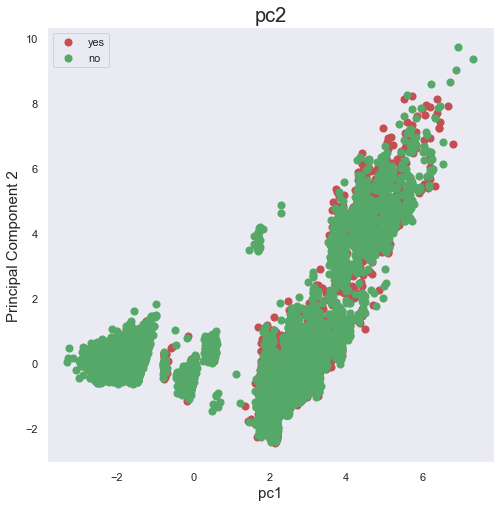

In [143]:
# PC1 and PC2 plot
pca_visualization('pc1', 'pc2')

This plot represents principle components 1 and 2 and shows the components with the most variance. We don't really see a separation between the 'yes' and 'no' groups. However, this only represents the numerical variables from the dataset, whis is about half our attributes. 

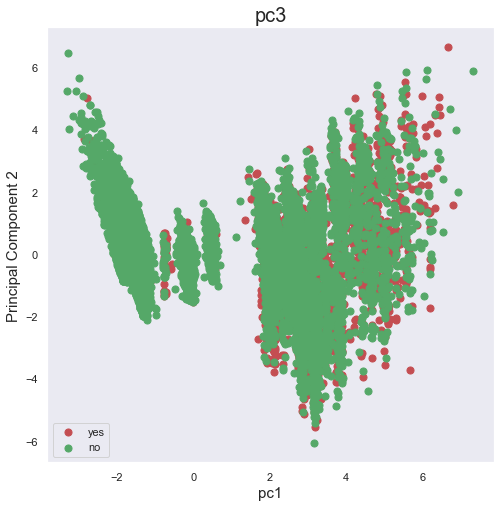

In [144]:
# PC1 and PC3 plot
pca_visualization('pc1', 'pc3')

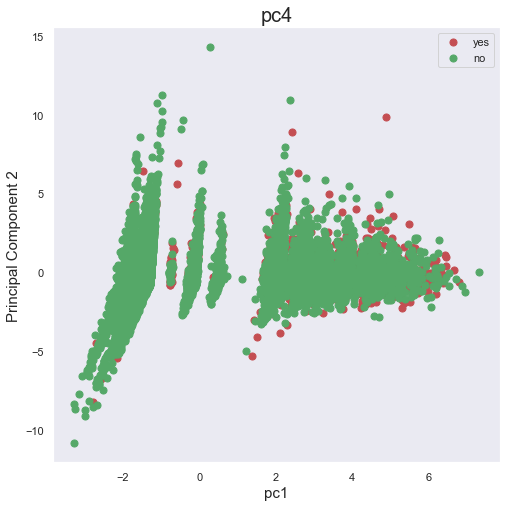

In [145]:
# PC1 and PC4 plot
pca_visualization('pc1', 'pc4')

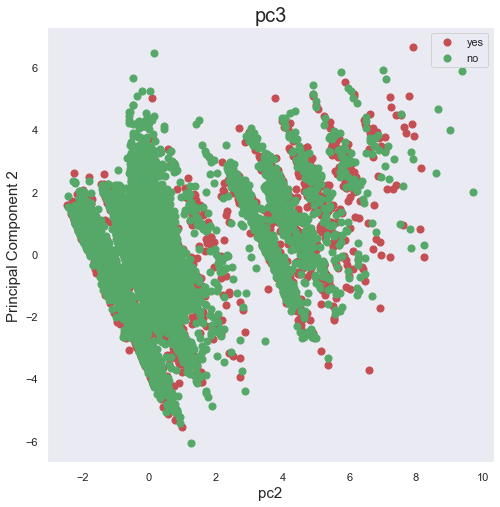

In [146]:
# PC2 and PC3 plot
pca_visualization('pc2', 'pc3')

Above we look into more principle component relationships, but PC1 and PC2 represent the most variance. 

# <span style="text-decoration:underline">Additional Features</span>


Different features we could add to our dataset include the bucket variable 'age' that was converted from a numerical to a categorical previously in this notebook. We also are looking at converting education into a bucket variable, like potentially combining basic 4, 6, and 9 year education and analyzing how that affects the predictive model. Duration is also given in seconds which could be converted to minutes for better interpretibility. 

While there is no way for us to gather more information on these specific customers, if we did have the opportunity to gather more data, some potentially useful attributes may include socioeconomic status, location within Portugal, number of children, etc.